In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
import math

#Data Exploration

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/dataset.csv", delimiter=';')

In [ ]:
df_original = df.copy()

In [ ]:
df["Datum"] = pd.to_datetime(df["Datum"])

In [ ]:
for col in df.iloc[:,1:].columns:
    if df[col].dtype == 'object':
      df[col] = df[col].str.replace(',', '.').astype(float)

In [ ]:
df.head()

,Datum,1,2,3,4,5,6,7,8,9,...,155,156,157,158,159,160,161,162,163,164
0,2023-01-07 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2023-01-07 00:15:00,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2023-01-07 00:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0
3,2023-01-07 00:45:00,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,-1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2023-01-07 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2976 entries, 0 to 2975
Columns: 165 entries, Datum to 164
dtypes: float64(161), object(4)
memory usage: 3.7+ MB


In [ ]:
df.shape

(2976, 165)

In [ ]:
# columns_to_check = ["86", "45", "4", "127", "45"]

# for col in columns_to_check:
#     print(f"Value counts for column {col}:")
#     print(df[col].value_counts())
#     print(df[col].unique())
#     print("-" * 50)

In [ ]:
# # Find columns that contain negative values
# list_of_neg_col = []
# df_copy = df.copy()
# for col in df.iloc[:,1:].columns:
#     if df_copy[col].dtype == 'object':
#       df_copy[col] = df_copy[col].str.replace(',', '.').astype(float)
#     if (df_copy[col] < 0.0).any():
#       list_of_neg_col.append(col)

In [ ]:
# list_of_neg_col

In [ ]:
df_nulls = df.isnull().sum()

In [ ]:
df_nulls.info()

<class 'pandas.core.series.Series'>
Index: 165 entries, Datum to 164
Series name: None
Non-Null Count  Dtype
--------------  -----
165 non-null    int64
dtypes: int64(1)
memory usage: 2.6+ KB


In [ ]:
for col in df.columns:
  if not df[col].isnull().values.any():
    print(col)

Datum


**So, The only column in the dataframe which is not null is 'Datum'.**

In [ ]:
df_nulls = df_nulls[1:]

In [ ]:
df_nulls.describe()

count    164.000000
mean      89.274390
std        9.337126
min       65.000000
25%       83.000000
50%       88.500000
75%       95.000000
max      116.000000
dtype: float64

In [ ]:
df_nulls.median()

88.5

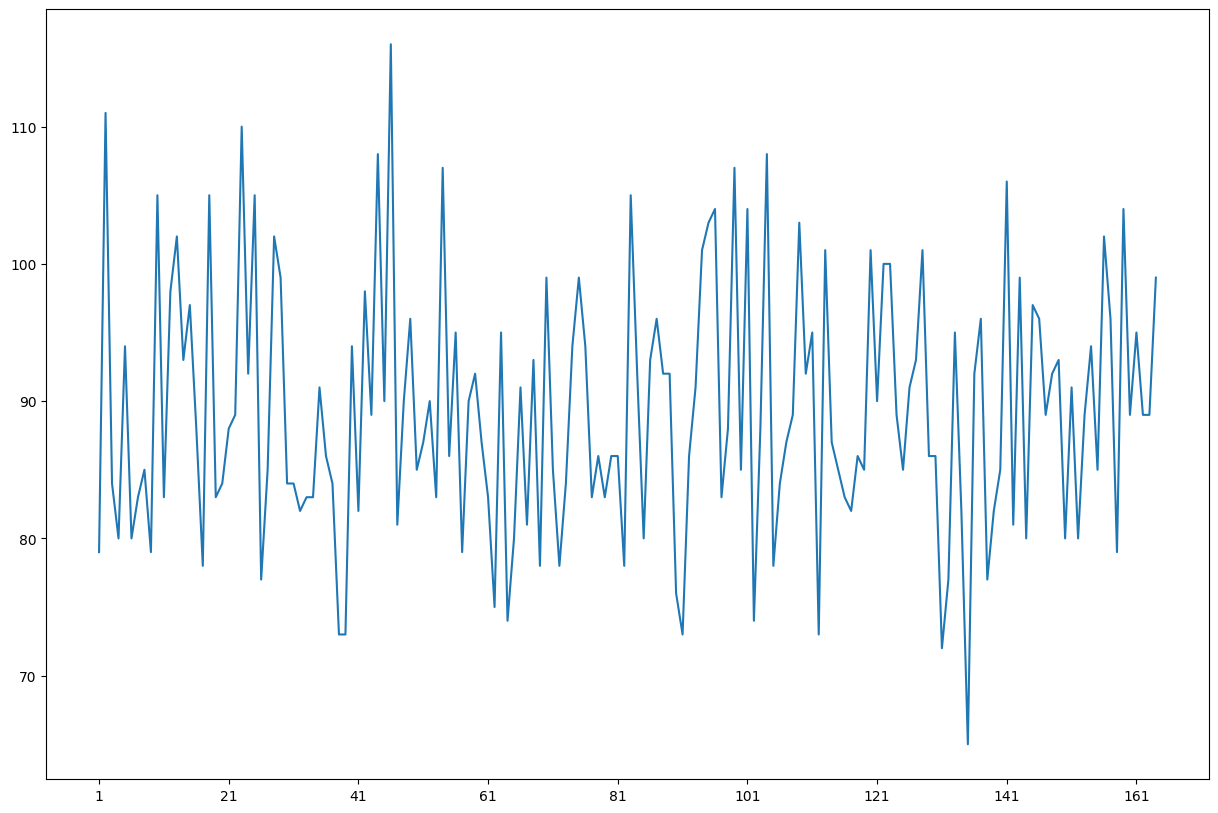

In [ ]:
df_nulls.plot(figsize=(15,10))
plt.show()

In [ ]:
df.isnull().sum().sum()

14641

**Observations:**

* Subsystems(columns) that are empty- 4, 86 aand 127.

* Subsystems(columns) that contain negative values- 9, 45 and 100. The column  45 contains only negative values which is -1.

* The df_nulls.info() tells that every subsystem has missing values and the "describe" indicates that it ranges from 65 to 116. The columns have mean number of 89.27 missing values whereas median says it's around 88.5. This can be seen from above plot where 'y=89' seems to be intersecting most of the values.

* Total number of Null values in the dataframe of shape 2975*164 is 14641.



---

